In [10]:
## Plot for Figure 5C / Informative/Uninformative Jitter tmap means
import scipy.io as sio
import seaborn as sns
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from utils import adjust_box_widths
from matplotlib.patches import PathPatch

import warnings
warnings.filterwarnings("ignore")

In [11]:
gpath = 'Jitter_Contrasts'
con = ['JITTER_INF_CONS', 'JITTER_UNINF_CONS']
con_txt = ['InformativeJitter', 'UninformativeJitter']
cluster = ['Thumb Cluster','Ringfinger Cluster']
cue = ['Ringfinger Cue', 'Thumb Cue']
lbl = ['Cluster','Cue','JitterCondition','Mean']
Jit_df  = pd.DataFrame(
            {lbl[0]: [],
             lbl[1]: [],
             lbl[2]: [],
             lbl[3]: [],
            })

for c in range(len(con)):
    mfile = os.path.join(gpath,con[c]+'/Masked_Jitters/Gmean.mat')
    mdata = sio.loadmat(mfile)
    means = mdata['means']
    for m in range(len(means)):
        #print(m, means[m][0])
        if m < 25:
            clue = cue[0]
            clus = cluster[0]
        elif 24 < m < 50:
            clue = cue[1]
            clus = cluster[0]
        elif 49 < m < 75:
            clue = cue[0]
            clus = cluster[1]
        elif 74 < m <100:
            clue = cue[1]
            clus = cluster[1]
        Jit_df = Jit_df.append({
                                      lbl[0]: clus,
                                      lbl[1]: clue,
                                      lbl[2]: con_txt[c],
                                      lbl[3]: means[m][0],
                                        }, ignore_index=True)

In [12]:
#Jit_df.groupby(['JitterCondition','Cluster','Cue']).mean()

In [13]:
#cp = sns.color_palette("colorblind")
#sns.palplot(cp)

In [14]:
def draw_line(axis,y1,y2,x1=0,x2=1):
    axis.plot([x1,x2],[y1,y2],color='lightgrey',ls='-',linewidth=1)
    
clusters = Jit_df.Cluster.unique()
conditions = Jit_df.JitterCondition.unique()

data_list = []

for condition in conditions:
    idx = 0
    cond_data = []
    for cluster in clusters:
        temp_df = Jit_df.loc[Jit_df['Cluster']==cluster].loc[Jit_df['JitterCondition']==condition].reset_index()
        for i in range(0,25):
            cond_data.append([temp_df.iloc[i].Mean,temp_df.iloc[i+25].Mean,idx-0.2,idx+0.2])
        idx += 1
        
    data_list.append(cond_data)
#data_list

In [15]:
def significance(axis, tick_value, data_ratio, max_value, text='***',offset=0.13,fontsize=20):
    hanbun_min = tick_value - data_ratio/2
    hanbun_max = tick_value + data_ratio/2
    axis.text(tick_value,max_value+0.52,text,bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':0.9},
          ha='center', va='center',fontsize=fontsize)
    axis.plot([hanbun_min,hanbun_max],[max_value+offset-0.03,max_value+offset-0.03],'k',linewidth=1)
    axis.plot([hanbun_min,hanbun_min],[max_value+offset-0.03,max_value+offset-0.25],'k',linewidth=1)
    axis.plot([hanbun_max,hanbun_max],[max_value+offset-0.03,max_value+offset-0.25],'k',linewidth=1)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


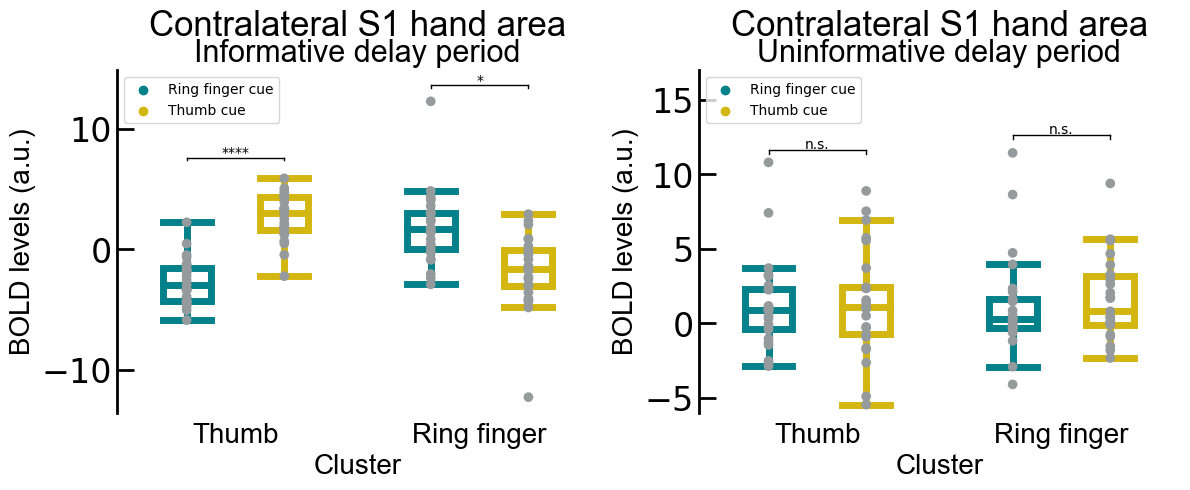

In [52]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'mediumblue','alpha': 1},
    'medianprops':{'color':'cornflowerblue','alpha': 1},
    'whiskerprops':{'color':'cornflowerblue','alpha': 1},
    'capprops':{'color':'cornflowerblue','alpha': 1}
}

fig, ax = plt.subplots(1,2)
fig.set_size_inches(12, 5)
#colors for the dots
#colors = ["#03818A", "#D4B611"]

#colors for the boxes
colors_box = ["#8CED9B", "#EDE88C"]

colors_box = ["#03818A", "#D4B611", "#68b9d4"]
colors =  ["#959b9c", "#959b9c", "#959b9c"]

df_inf = Jit_df.loc[Jit_df['JitterCondition']=='InformativeJitter']
df_uninf = Jit_df.loc[Jit_df['JitterCondition']=='UninformativeJitter']

signif_data = [
    [7.5,13.5],
    [11.5,12.5]
]

data = [df_inf,df_uninf]

#significance values
signif_text = [
    ["****","*"],
    ["n.s.","n.s."]
]

y_labels = [
    [str(x) for x in range(-15,15,2)],
    [str(x) for x in range(-7,15,2)]
]

title = ["Contralateral S1 hand area", "Contralateral S1 hand area"]
subtitle = ["Informative delay period", "Uninformative delay period"]


y = 'Mean'
x = 'Cluster'
c = 'Cue'

# #for dot size, change the size parameter
for idx,axis in enumerate(ax):
    df_con = data[idx]
    
    boxplot = sns.boxplot(
        data=df_con,
        hue=c,
        x=x,
        y=y,
        fliersize=0,
        palette=colors_box,
        ax=axis,
        linewidth=5,
        **PROPS
    )
    
    #CHANGE BOXPLOT STYLE

    box_patches = [patch for patch in boxplot.patches if type(patch) == matplotlib.patches.PathPatch]
    if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
        box_patches = boxplot.artists
    
    num_patches = len(box_patches)
    lines_per_boxplot = len(boxplot.lines) // num_patches

    for i, patch in enumerate(box_patches):
    
        col = colors_box[i%2]
        patch.set_edgecolor(col)
        patch.set_facecolor('None')
    
        for line in boxplot.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
            line.set_color(col)
        
        
    #END CHANGE BOXPLOT STYLE
    
    axis = sns.stripplot(
        data=df_con,
        x=x,
        y=y,
        jitter=0,
        palette=colors,
        hue=c,
        #size parameter
        size=7,
        dodge=True,
        ax=axis,
    )
       

    plt.rc('ytick', labelsize=10)
    plt.rc('xtick', labelsize=10)
    axis.set_xlabel("Cluster",fontsize=20,fontname='Arial')
    axis.set_xticklabels(['Thumb', 'Ring finger'], fontsize=20,fontname='Arial')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_linewidth(2)

    axis.set_ylabel("BOLD levels (a.u.)",fontsize=20,fontname='Arial')
    axis.set_title(subtitle[idx],size=22,fontname='Arial')
    
    significance(axis,0,0.4,signif_data[idx][0],fontsize=10,text=signif_text[idx][0])
    significance(axis,1,0.4,signif_data[idx][1],fontsize=10,text=signif_text[idx][1])
    
    #Updating the legend
    hand, labl = axis.get_legend_handles_labels()
    if(idx==1):
        axis.set_ylim([-6,17])
    axis.legend(hand[2:],["Ring finger cue","Thumb cue"],loc="upper left")
    
    leg = axis.get_legend()
    leg.legendHandles[0].set_color(colors_box[0])
    leg.legendHandles[1].set_color(colors_box[1])
    
    #Adding the main title
    ymax = axis.get_ylim()[1]
    ystep = (ymax + abs(axis.get_ylim()[0])) / 10
    axis.text(s=title[idx], y=ymax + ystep, x=0.5, ha='center', fontsize = 25,fontname='Arial')
    axis.tick_params(bottom = False)
    axis.tick_params(axis='y', which='major', direction='in',length=12, labelsize=24, width=2)

plt.locator_params(axis='y', nbins=5)
plt.tight_layout()
fig.tight_layout()
adjust_box_widths(fig, 0.5)
fig.savefig("Fig4B_v4.jpg",dpi=500)
plt.savefig('Fig4B_v4.eps', format='eps')



## Swap Cluster and Cue

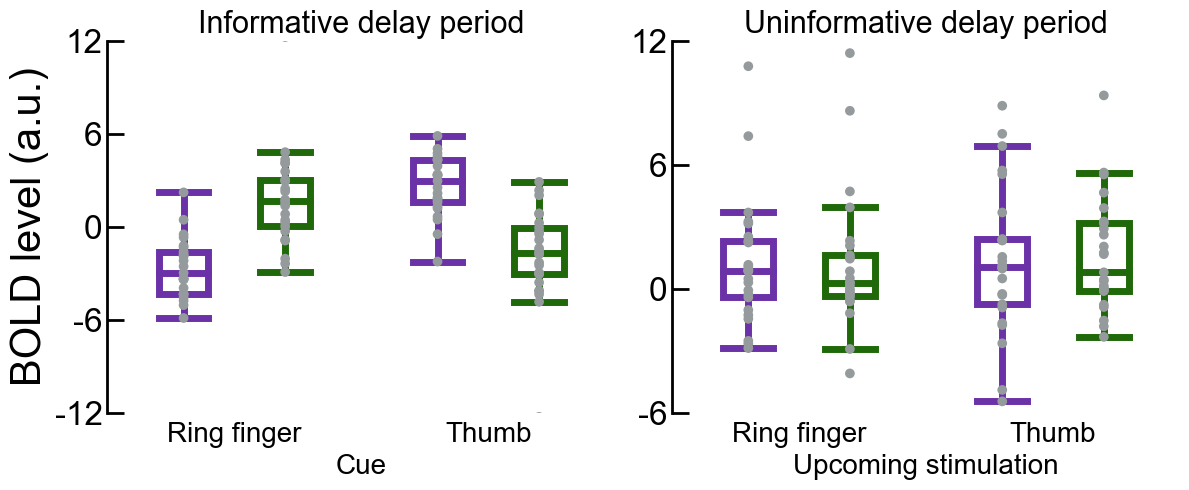

In [53]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12, 5)

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'mediumblue','alpha': 1},
    'medianprops':{'color':'cornflowerblue','alpha': 1},
    'whiskerprops':{'color':'cornflowerblue','alpha': 1},
    'capprops':{'color':'cornflowerblue','alpha': 1}
}


#colors for the dots
#colors = ["#03818A", "#D4B611"]

#colors for the boxes
colors_box = [["#9321C4", "#2AAB67"],["#9321C4", "#2AAB67"]]
colors_box = [["#6b32a8", "#20690a"],["#6b32a8", "#20690a"]]

#5232a8
#20690a
#"#9321C4", "#2AAB67"
colors =  [["#959b9c", "#959b9c", "#959b9c"],["#959b9c", "#959b9c", "#959b9c"]]

df_inf = Jit_df.loc[Jit_df['JitterCondition']=='InformativeJitter']
df_uninf = Jit_df.loc[Jit_df['JitterCondition']=='UninformativeJitter']

signif_data = [
    [7.5,13.5],
    [11.5,12.5]
]

data = [df_inf,df_uninf]

#significance values
signif_text = [
    ["****","*"],
    ["n.s.","n.s."]
]

#text shown in legend
legend_text = [
    ["Thumb cluster","Ring finger cluster"],
    ["Thumb cluster","Ring finger Cluster"]
]

y_labels = [
    [str(x) for x in range(-15,15,2)],
    [str(x) for x in range(-7,15,2)]
]

title = ["Contralateral S1 hand area", "Contralateral S1 hand area"]
title = ['','']

subtitle = ["Informative delay period", "Uninformative delay period"]
bottom_title = ["Cue","Upcoming stimulation"]
x = 'Cue'
y = 'Mean'
c = 'Cluster'

# #for dot size, change the size parameter
for idx,axis in enumerate(ax):
    df_con = data[idx]
    
    boxplot = sns.boxplot(
        data=df_con,
        hue=c,
        x=x,
        y=y,
        fliersize=0,
        palette=colors_box[idx],
        ax=axis,
        linewidth=5,
        **PROPS
    )
    
    #CHANGE BOXPLOT STYLE

    box_patches = [patch for patch in boxplot.patches if type(patch) == matplotlib.patches.PathPatch]
    if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
        box_patches = boxplot.artists
    
    num_patches = len(box_patches)
    lines_per_boxplot = len(boxplot.lines) // num_patches

    for i, patch in enumerate(box_patches):
    
        col = colors_box[idx][i%2]
        patch.set_edgecolor(col)
        patch.set_facecolor('None')
    
        for line in boxplot.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
            line.set_color(col)
        
        
    #END CHANGE BOXPLOT STYLE
    
    axis = sns.stripplot(
        data=df_con,
        x=x,
        y=y,
        jitter=0,
        palette=colors[idx],
        hue=c,
        size=7,
        dodge=True,
        ax=axis,
    )

    plt.rc('ytick', labelsize=10)
    plt.rc('xtick', labelsize=10)
    axis.set_xlabel(bottom_title[idx],fontsize=20,fontname='Arial')
    axis.set_xticklabels(['Ring finger', 'Thumb'], fontsize=20,fontname='Arial')

    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_linewidth(2)
    #axis.spines['bottom'].set_linewidth(2)
    
    axis.set_ylabel("BOLD level (a.u.)",fontsize=30,fontname='Arial')
    axis.set_title(subtitle[idx],size=22,fontname='Arial')
    
    #significance(axis,0,0.4,signif_data[idx][0],fontsize=10,text=signif_text[idx][0])
    #significance(axis,1,0.4,signif_data[idx][1],fontsize=10,text=signif_text[idx][1])
    
    #Updating the legend
    hand, labl = axis.get_legend_handles_labels()
    if(idx==1):
        axis.set_ylim([-6,12])
        axis.set_yticks([-6,0,6,12], fontname='Arial')
        axis.set_yticklabels(['-6','0','6','12'],fontname='Arial')
        axis.set_ylabel("")
        #axis.set_xlim([0,3])
    else:
        axis.set_ylim([-12,12])
        axis.set_yticks([-12,-6,0,6,12], fontname='Arial')
        axis.set_yticklabels(['-12','-6','0','6','12'],fontname='Arial')
       
    axis.legend(hand[2:],legend_text[idx],loc="upper left")
    
    leg = axis.get_legend()
    leg.legendHandles[0].set_color(colors_box[idx][0])
    leg.legendHandles[1].set_color(colors_box[idx][1])
    axis.get_legend().remove()
    
    #Adding the main title
    ymax = axis.get_ylim()[1]
    ystep = (ymax + abs(axis.get_ylim()[0])) / 10
    axis.text(s=title[idx], y=ymax + ystep, x=0.5, ha='center', fontsize = 25)
    axis.tick_params(bottom = False)
    axis.tick_params(axis='y', which='major', direction='in',length=12, labelsize=24, width=2)

plt.locator_params(axis='y', nbins=5)
plt.tight_layout()
fig.tight_layout()
adjust_box_widths(fig, 0.5)
fig.savefig("Fig4B.jpg",dpi=500)
plt.savefig('Fig4B.eps', format='eps')



In [18]:
col = ['Mean']
df_1 = df_inf.loc[df_inf['Cluster']=="Thumb Cluster"].loc[df_inf['Cue']=="Ringfinger Cue"].reset_index()
df_2 = df_inf.loc[df_inf['Cluster']=="Thumb Cluster"].loc[df_inf['Cue']=="Thumb Cue"].reset_index()
df_3 = df_inf.loc[df_inf['Cluster']=="Ringfinger Cluster"].loc[df_inf['Cue']=="Ringfinger Cue"].reset_index()
df_4 = df_inf.loc[df_inf['Cluster']=="Ringfinger Cluster"].loc[df_inf['Cue']=="Thumb Cue"].reset_index()
df_5 = df_uninf.loc[df_uninf['Cluster']=="Thumb Cluster"].loc[df_uninf['Cue']=="Ringfinger Cue"].reset_index()
df_6 = df_uninf.loc[df_uninf['Cluster']=="Thumb Cluster"].loc[df_uninf['Cue']=="Thumb Cue"].reset_index()
df_7 = df_uninf.loc[df_uninf['Cluster']=="Ringfinger Cluster"].loc[df_uninf['Cue']=="Ringfinger Cue"].reset_index()
df_8 = df_uninf.loc[df_uninf['Cluster']=="Ringfinger Cluster"].loc[df_uninf['Cue']=="Thumb Cue"].reset_index()

data = pd.concat([df_1[col],df_2[col],df_3[col],df_4[col],df_5[col],df_6[col],df_7[col],df_8[col]],axis=1)
data.columns = ['Informative Thumb Cluster Ringfinger Cue','Informative Thumb Cluster Thumb Cue',
                'Informative Ringfinger Cluster Ringfinger Cue','Informative Ringfinger Cluster Thumb Cue',
                'Uninformative Thumb Cluster Ringfinger Cue','Uninformative Thumb Cluster Thumb Cue',
                'Uninformative Ringfinger Cluster Ringfinger Cue','Uninformative Ringfinger Cluster Thumb Cue']
data.to_csv('Fig4b_delaybold_export.csv')
data

,Informative Thumb Cluster Ringfinger Cue,Informative Thumb Cluster Thumb Cue,Informative Ringfinger Cluster Ringfinger Cue,Informative Ringfinger Cluster Thumb Cue,Uninformative Thumb Cluster Ringfinger Cue,Uninformative Thumb Cluster Thumb Cue,Uninformative Ringfinger Cluster Ringfinger Cue,Uninformative Ringfinger Cluster Thumb Cue
0,-4.764137,4.764127,0.834985,-0.834987,1.166255,3.702250,-1.181361,-0.004657
1,-5.884550,5.884515,3.585621,-3.585623,0.486653,1.015655,4.724147,3.917352
2,-4.558543,4.558522,-0.835378,0.835374,-0.069987,-0.244917,-0.092937,0.035783
3,-1.596901,1.596899,-2.368186,2.368186,0.884251,1.551830,0.305852,1.682227
4,-1.322946,1.322946,1.765777,-1.765769,0.959028,1.347189,2.099613,1.748983
5,-3.942235,3.942229,1.505091,-1.505088,-0.415664,-5.455794,1.517289,-2.328397
6,-5.051913,5.051921,4.836346,-4.836374,2.314739,5.560639,0.292888,5.546044
7,-0.670787,0.670785,2.958966,-2.958963,-1.454569,-0.293945,0.154335,0.378198
8,-2.181505,2.181507,4.354004,-4.354011,0.307409,-1.663287,0.854031,3.176150
9,-1.730789,1.730789,2.297146,-2.297156,2.529266,1.059890,-0.015769,0.800820
